In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import pandas as pd


In [ ]:
!pip install kaggle

In [4]:
kaggle_credentials=json.load(open('/content/kaggle (1).json'))

In [5]:
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [6]:
#!/bin/bash
!kaggle datasets download laotse/credit-risk-dataset

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0


In [7]:
with ZipFile ('credit-risk-dataset.zip','r') as zip_ref:
  zip_ref.extractall()

In [8]:
data=pd.read_csv('/content/credit_risk_dataset.csv')
data.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
data['person_home_ownership'].value_counts()

In [ ]:
data['cb_person_default_on_file'].value_counts()

In [ ]:
data['loan_intent'].value_counts()

In [11]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
home_encoder=LabelEncoder()
labels=home_encoder.fit_transform(data.person_home_ownership)
data['person_home_ownership']=labels;

In [ ]:
intent_encoder=LabelEncoder()
labels1=intent_encoder.fit_transform(data.loan_intent)
data['loan_intent']=labels1;
data['loan_intent'].value_counts()

In [ ]:

labels2=label_encoder.fit_transform(data.loan_grade)
data['loan_grade']=labels2;
data['loan_grade'].value_counts()

In [ ]:
labels2=label_encoder.fit_transform(data.cb_person_default_on_file)
data['cb_person_default_on_file']=labels2;
data['cb_person_default_on_file'].value_counts()

In [15]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


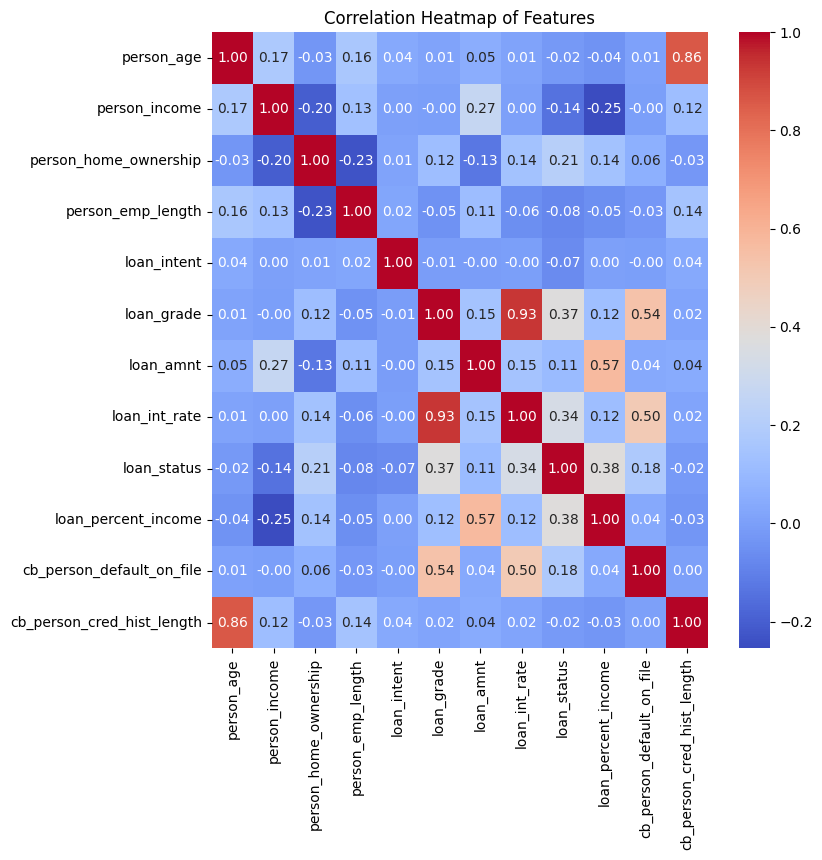

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [17]:
#trying undersampling
data['cb_person_default_on_file'].value_counts()

,count
cb_person_default_on_file,
0,26836
1,5745


In [18]:
#Performing undersampling to deal with class imbalance
default=data[data.cb_person_default_on_file==1]
not_default=data[data.cb_person_default_on_file==0]

In [19]:
not_default_sample=not_default.sample(n=5745)
print(not_default_sample.shape)
new_data=pd.concat([not_default_sample,default],axis=0)
data.head()

(5745, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [20]:
new_data['cb_person_default_on_file'].value_counts()

,count
cb_person_default_on_file,
0,5745
1,5745


In [46]:
new_data.shape

(11490, 12)

In [23]:
from sklearn.model_selection import train_test_split
X = new_data.drop(columns=['cb_person_default_on_file'])
Y = new_data['cb_person_default_on_file']
X=X.drop(columns={'person_age', 'person_income','loan_intent','cb_person_cred_hist_length'})

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
#Handling missing values
X_train.isnull().sum()

,0
person_home_ownership,0
person_emp_length,238
loan_grade,0
loan_amnt,0
loan_int_rate,868
loan_status,0
loan_percent_income,0


In [26]:
X_train = X_train.copy()
X_train['person_emp_length'] = X_train['person_emp_length'].fillna(0)

<ipython-input-27-8a4bcafe6be8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.loan_int_rate)


<Axes: xlabel='loan_int_rate', ylabel='Density'>

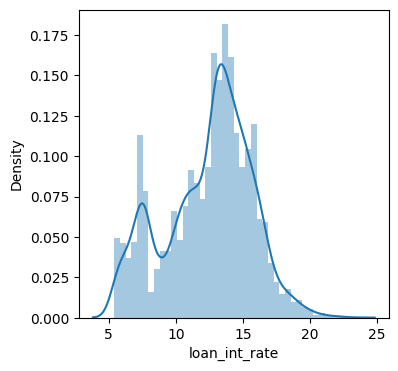

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(4,4))
sns.distplot(X_train.loan_int_rate)

In [28]:
X_train['loan_int_rate'] = X_train['loan_int_rate'].fillna(X_train['loan_int_rate'].mean())

In [29]:
X_test.isnull().sum()

,0
person_home_ownership,0
person_emp_length,46
loan_grade,0
loan_amnt,0
loan_int_rate,203
loan_status,0
loan_percent_income,0


In [30]:
X_test['person_emp_length'] = X_test['person_emp_length'].fillna(0)

<ipython-input-31-128af55e81d1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test.loan_int_rate)


<Axes: xlabel='loan_int_rate', ylabel='Density'>

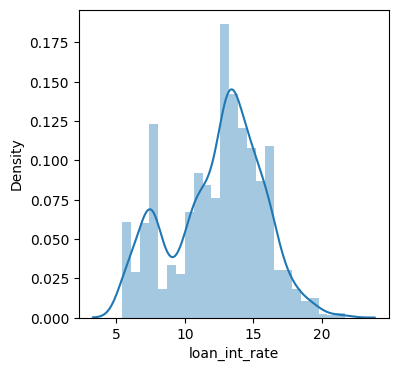

In [31]:

fig,ax=plt.subplots(figsize=(4,4))
sns.distplot(X_test.loan_int_rate)

In [32]:
X_test['loan_int_rate'] = X_test['loan_int_rate'].fillna(X_test['loan_int_rate'].mean())

In [33]:
X_test.isnull().sum()

,0
person_home_ownership,0
person_emp_length,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [34]:
Y_test.isnull().sum()

np.int64(0)

In [35]:
#Handling duplicate values
X_train.duplicated().sum()

np.int64(363)

In [36]:

# Drop duplicate rows
X_train = X_train.drop_duplicates()
Y_train = Y_train.loc[X_train.index]

In [37]:
new_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4043,23,65000,3,1.0,4,0,4000,7.49,0,0.06,0,4
12094,25,79700,0,6.0,2,0,10000,NaN,0,0.13,0,4
28628,31,54050,3,8.0,1,1,12000,10.99,0,0.22,0,9
21100,31,45000,0,6.0,0,0,2500,7.88,0,0.06,0,8
10287,25,83000,3,3.0,1,1,9600,10.99,0,0.12,0,2


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
import xgboost as xgb
model = xgb.XGBClassifier()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)


In [51]:
model.score(X_train,Y_train)

0.9324951863178162

In [40]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1169
           1       0.82      0.97      0.89      1129

    accuracy                           0.88      2298
   macro avg       0.89      0.88      0.88      2298
weighted avg       0.89      0.88      0.88      2298



In [41]:
# In your Google Colab
import joblib
encoders = {
    'person_home_ownership': home_encoder,
    'loan_intent': intent_encoder,
    'loan_grade': label_encoder
}
joblib.dump(encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [42]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [43]:
from google.colab import files
files.download('model.pkl')
files.download('label_encoders.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>